# Introduction

This tutorial will demonstrate how to use feature agglomeration to merge similar features in a dataset. Feature agglomeration is useful when working with high-dimensional datasets by reducing the number of features while preserving the most important information.

# Import Libraries

In this step, we will import the necessary libraries to perform feature agglomeration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph

# Load Dataset

In this step, we will load the digits dataset from scikit-learn. This dataset contains images of handwritten digits from 0 to 9.

In [2]:
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))

# Define Connectivity Matrix

In this step, we will define the connectivity matrix using the **grid_to_graph** function from scikit-learn. This function creates a connectivity graph based on the pixel grid of the images.

In [3]:
connectivity = grid_to_graph(*images[0].shape)

# Perform Feature Agglomeration

In this step, we will perform feature agglomeration using the **FeatureAgglomeration** class from scikit-learn. We will set the number of clusters to 32.

In [4]:
agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
agglo.fit(X)
X_reduced = agglo.transform(X)

# Inverse Transform

In this step, we will perform an inverse transform on the reduced dataset to restore the original number of features.

In [5]:
X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)

# Visualize Results

In this step, we will visualize the original images, the agglomerated images, and the labels assigned to each cluster.

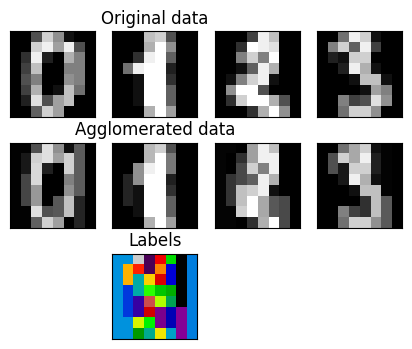

In [6]:
plt.figure(1, figsize=(4, 3.5))
plt.clf()
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91)
for i in range(4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
    if i == 1:
        plt.title("Original data")
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16, interpolation="nearest")
    if i == 1:
        plt.title("Agglomerated data")
    plt.xticks(())
    plt.yticks(())

plt.subplot(3, 4, 10)
plt.imshow(
    np.reshape(agglo.labels_, images[0].shape),
    interpolation="nearest",
    cmap=plt.cm.nipy_spectral,
)
plt.xticks(())
plt.yticks(())
plt.title("Labels")
plt.show()

# Summary

In this tutorial, we have learned how to use feature agglomeration to merge similar features in a dataset. By reducing the number of features, we can improve the performance of machine learning algorithms while preserving the most important information in the dataset.